# ==========================
# ***Heart Disease Prediction***
# ==========================

#**Cell 1: Import Libraries**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, roc_auc_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import joblib


In [45]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Cell 2: Load Dataset**

In [46]:
df = pd.read_csv("/content/heart.csv")  # change path if needed
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#**Cell 3: Data Summary**

In [47]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


#**Cell 4: EDA (Basic)**

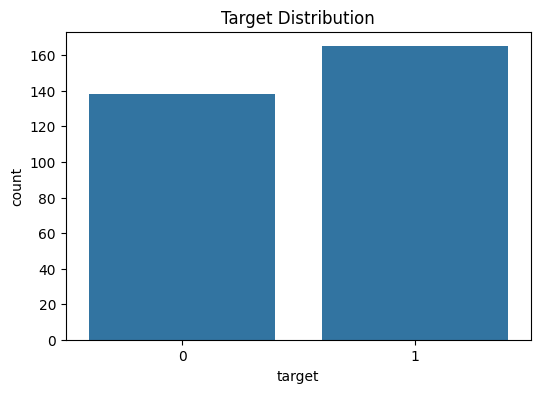

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title("Target Distribution")
plt.show()


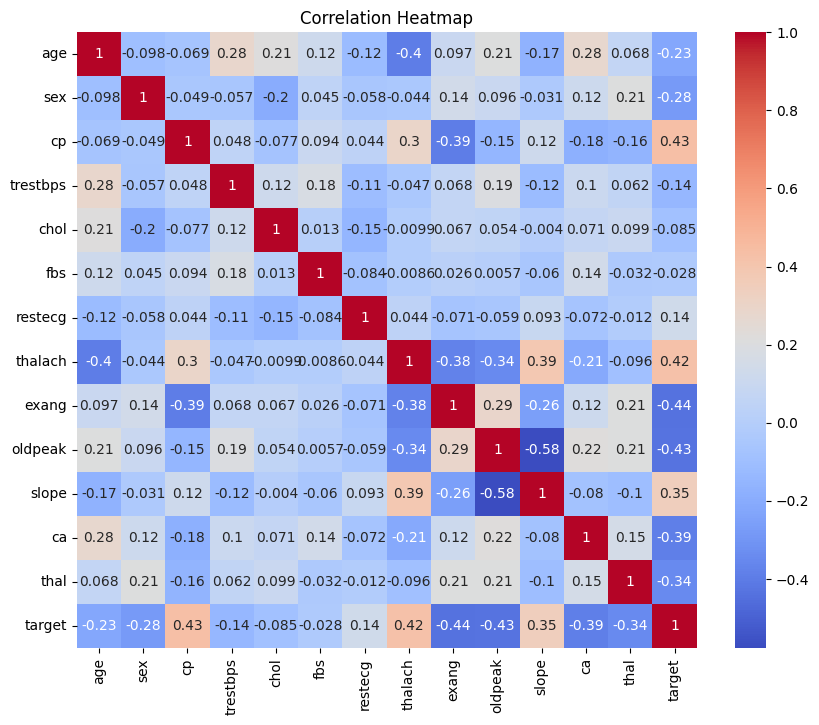

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


#**Cell 5: Split Features/Labels**

In [50]:
X = df.drop("target", axis=1)
y = df["target"]


#**Cell 6: Train-Test Split**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**MODELS (Working perfectly for numeric heart dataset)**

In [52]:
scaler = StandardScaler()


#**Cell 7: Logistic Regression**

In [53]:
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=500))
])

lr_pipeline.fit(X_train, y_train)

y_pred_lr = lr_pipeline.predict(X_test)
y_prob_lr = lr_pipeline.predict_proba(X_test)[:,1]


#**Cell 8: Decision Tree**



In [54]:
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier())
])

dt_pipeline.fit(X_train, y_train)

y_pred_dt = dt_pipeline.predict(X_test)
y_prob_dt = dt_pipeline.predict_proba(X_test)[:,1]


#**Cell 9: Random Forest**


In [55]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)
y_prob_rf = rf_pipeline.predict_proba(X_test)[:,1]


#**Cell 10: Neural Network (AI Model)**

In [56]:
nn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation='relu',
        solver='adam',
        max_iter=500,
        random_state=42
    ))
])

nn_pipeline.fit(X_train, y_train)

y_pred_nn = nn_pipeline.predict(X_test)
y_prob_nn = nn_pipeline.predict_proba(X_test)[:,1]


#**Cell 11: Evaluation Function**

In [57]:
def evaluate(name, y_true, y_pred, y_prob):
    print(f"\n===== {name} =====")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_prob))
    print(classification_report(y_true, y_pred))



#**Cell 12: Evaluate All Models**

In [58]:
evaluate("Logistic Regression", y_test, y_pred_lr, y_prob_lr)
evaluate("Decision Tree", y_test, y_pred_dt, y_prob_dt)
evaluate("Random Forest", y_test, y_pred_rf, y_prob_rf)
evaluate("Neural Network", y_test, y_pred_nn, y_prob_nn)



===== Logistic Regression =====
Accuracy: 0.8524590163934426
ROC-AUC: 0.9267241379310345
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


===== Decision Tree =====
Accuracy: 0.8360655737704918
ROC-AUC: 0.8389008620689655
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


===== Random Forest =====
Accuracy: 0.8360655737704918
ROC-AUC: 0.9224137931034483
              precision    recall  f1-score   support

           0       0.83      0.83

#**Cell 13: ROC Curve Comparison**

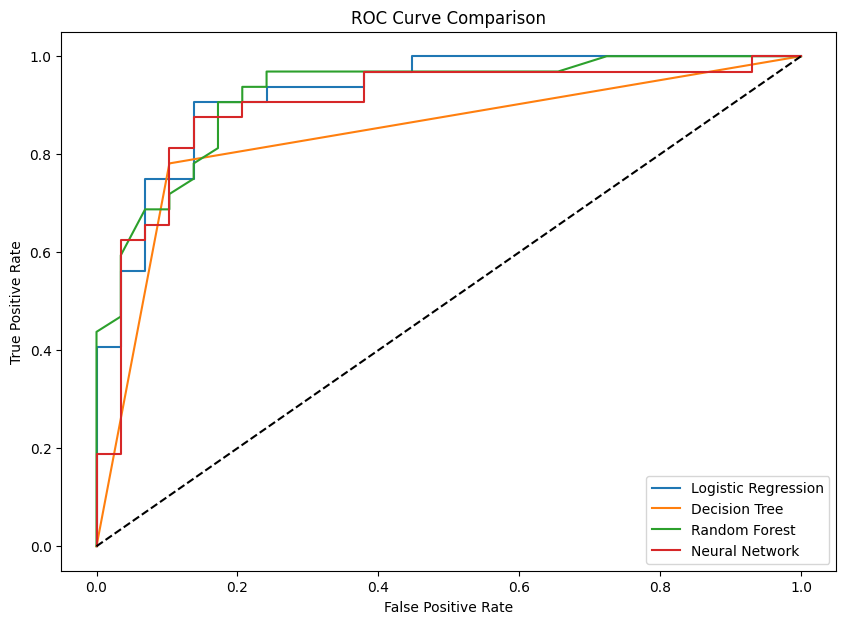

In [59]:
plt.figure(figsize=(10,7))

models = {
    "Logistic Regression": y_prob_lr,
    "Decision Tree": y_prob_dt,
    "Random Forest": y_prob_rf,
    "Neural Network": y_prob_nn
}

for name, prob in models.items():
    fpr, tpr, _ = roc_curve(y_test, prob)
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


#**Cell 14: Model Comparison Table**

In [60]:
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "Neural Network"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_nn),
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_dt),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_nn),
    ]
})

comparison


,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.852459,0.926724
1,Decision Tree,0.836066,0.838901
2,Random Forest,0.836066,0.922414
3,Neural Network,0.852459,0.898707


#**Cell 15: Feature Importance (Random Forest)**

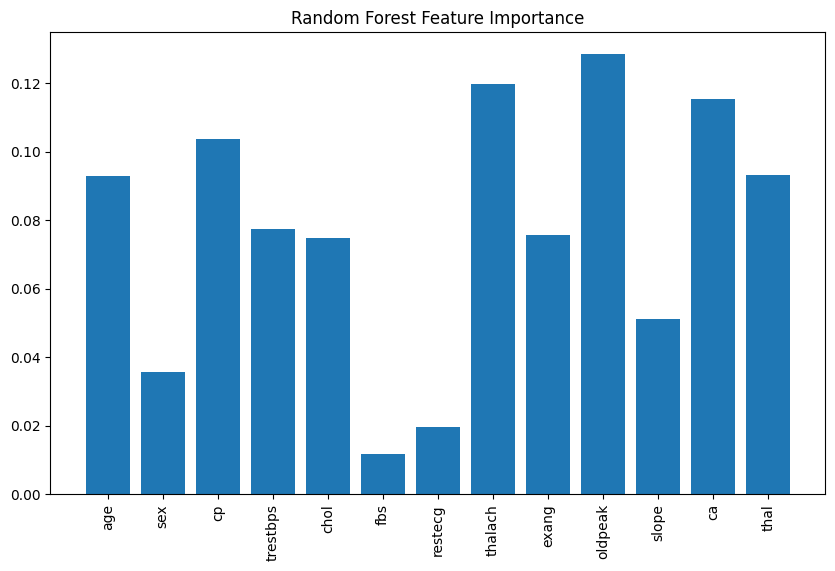

In [42]:
rf = rf_pipeline.named_steps['model']
importances = rf.feature_importances_

plt.figure(figsize=(10,6))
plt.bar(X.columns, importances)
plt.xticks(rotation=90)
plt.title("Random Forest Feature Importance")
plt.show()


#**Cell 16: Save Best Model**

In [61]:
joblib.dump(rf_pipeline, "random_forest_model.pkl")
joblib.dump(nn_pipeline, "neural_network_model.pkl")


['neural_network_model.pkl']